In [2]:
import os
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("INC 5000 Companies 2019.csv")

In [4]:
## High level checks

print("-- Shape (Rows x Columns) --")
print(df.shape)
print("-- Count Nulls --")
print(np.sum(df.isnull()))
print("-- Data Types--")
print(df.dtypes)

-- Shape (Rows x Columns) --
(5012, 14)
-- Count Nulls --
rank                  0
profile               0
name                  0
url                   0
state                 0
revenue               0
growth_%              0
industry              0
workers               1
previous_workers      0
founded               0
yrs_on_list           0
metro               813
city                  0
dtype: int64
-- Data Types--
rank                  int64
profile              object
name                 object
url                  object
state                object
revenue              object
growth_%            float64
industry             object
workers             float64
previous_workers      int64
founded               int64
yrs_on_list           int64
metro                object
city                 object
dtype: object


# Part 1: Number of companies and revenue by industry

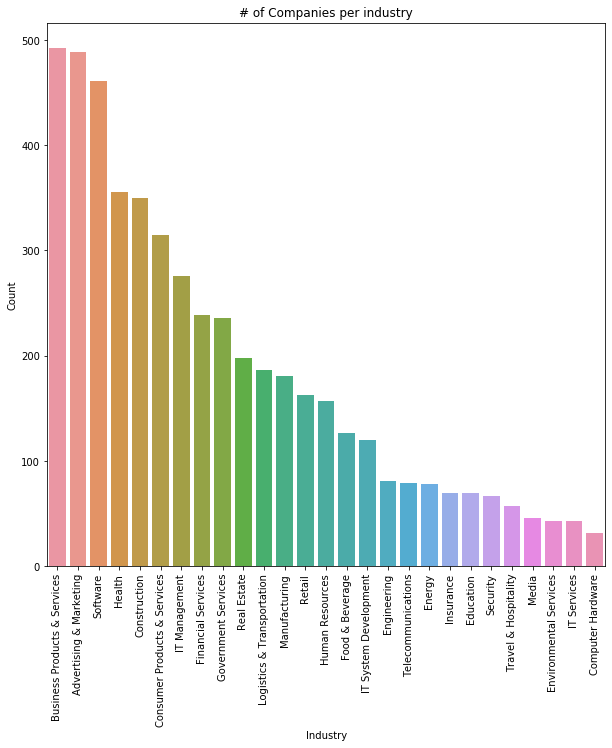

In [5]:
industry_count = (df.industry.value_counts()).to_frame().reset_index().rename(columns={'index':'Industry','industry':'Count'})


f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x='Industry',y='Count',data=industry_count)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_title("# of Companies per industry");
# industry_count

## Average Revenue by Industry

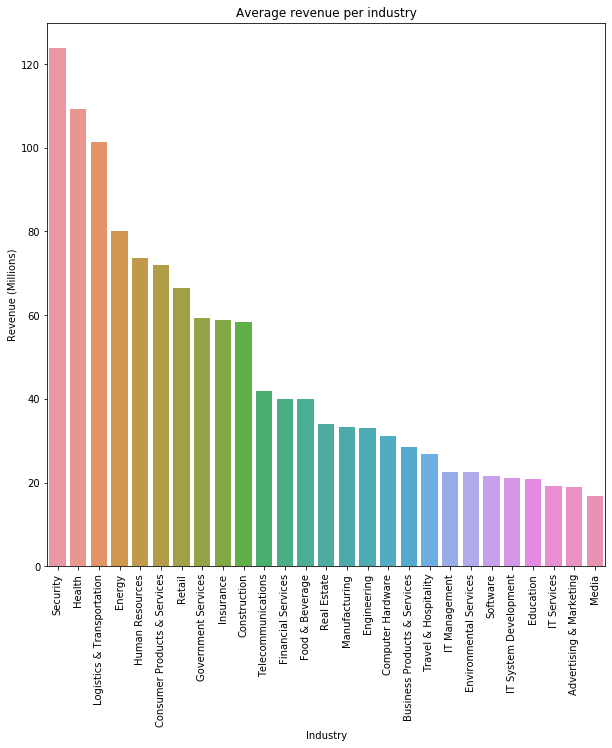

In [6]:
df['revenue_value']= df['revenue'].apply(lambda x: x.split(' ',1)[0]).astype(float)


df['revenue_units'] = df['revenue'].apply(lambda x: x.split(' ',1)[1]).astype(str)

def check_units(unit,num):
    if unit == "Million":
        return num
    if unit == "Billion":
        return num*1000
df['revenue_value']=df.apply(lambda x: check_units(x['revenue_units'],x['revenue_value']),axis=1)


revenue_data = df.groupby(by='industry')['revenue_value'].mean().round(2).to_frame().reset_index().rename(columns={'industry':'Industry','revenue_value':'Revenue'})

revenue_data = revenue_data.sort_values(by='Revenue',ascending=False)

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x='Industry',y='Revenue',data=revenue_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_title("Average revenue per industry")
ax.set_ylabel("Revenue (Millions)");

## Geographic Trends

In [7]:
states = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'PR': 'Puerto Rico',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}

df['state_name']=df.state.apply(lambda x: states[x])

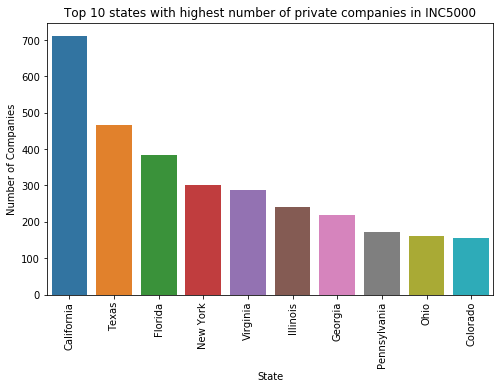

In [8]:
top10_states = df.state_name.value_counts()[:10].to_frame().reset_index().rename(columns={'index':'State','state_name':'Number of Companies'})

f, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='State',y='Number of Companies', data=top10_states)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_title("Top 10 states with highest number of private companies in INC5000");


# Part 2: Avg. Growth rate by industries 


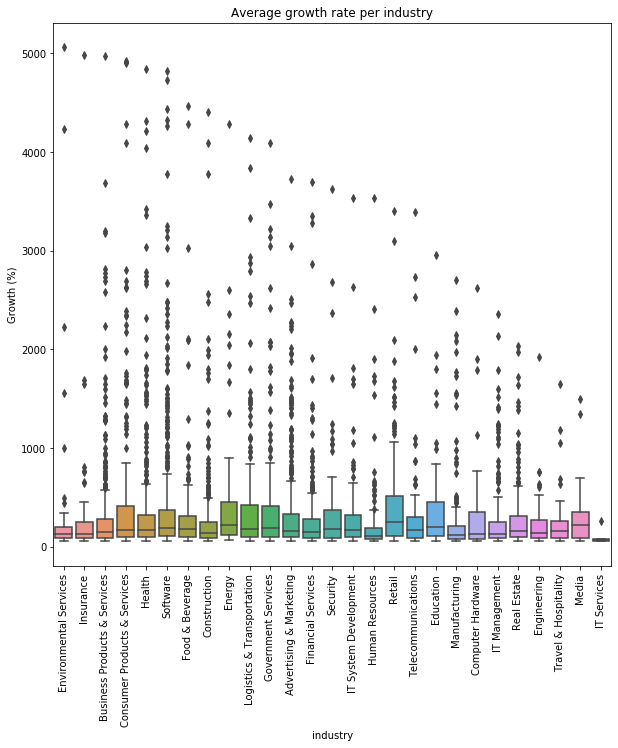

In [10]:
# df['revenue_value']= df['revenue'].apply(lambda x: x.split(' ',1)[0]).astype(float)
# revenue_data = df.groupby(by='industry')['growth_%'].mean().round(2).to_frame().reset_index().rename(columns={'industry':'Industry','revenue_value':'Revenue'})

df['worker_growth']=(df['workers']/df['previous_workers'] -1) *100
# remove outliers

# from worker growth column
q_low = df["worker_growth"].quantile(0.01)
q_hi  = df["worker_growth"].quantile(0.99)

df_filtered = df[(df["worker_growth"] < q_hi) & (df["worker_growth"] > q_low)]

# from growth % column

q_low = df["growth_%"].quantile(0.01)
q_hi  = df["growth_%"].quantile(0.99)

df_filtered = df_filtered[(df_filtered["growth_%"] < q_hi) & (df_filtered["growth_%"] > q_low)]


df_filtered.sort_values(by='growth_%',ascending=False)



revenue_data = df[['industry','growth_%']].rename(columns={'industry':'Industry','revenue_value':'Revenue'})
#.mean().round(2).to_frame().reset_index().rename(columns={'industry':'Industry','revenue_value':'Revenue'})

revenue_data = revenue_data.sort_values(by='growth_%',ascending=False)


f, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x='industry',y='growth_%',data=df_filtered)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_title("Average growth rate per industry")
ax.set_ylabel("Growth (%)");

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<Figure size 432x288 with 0 Axes>

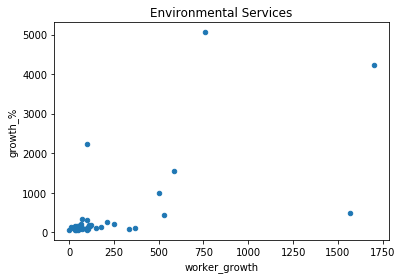

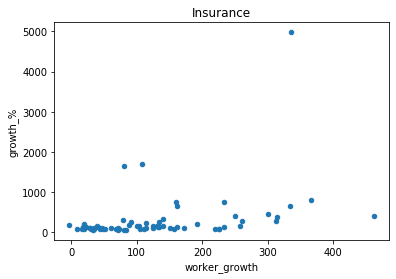

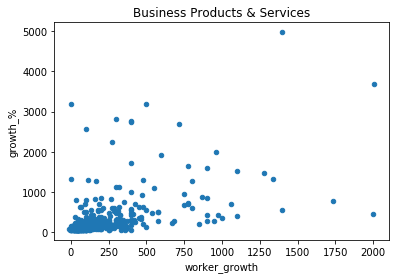

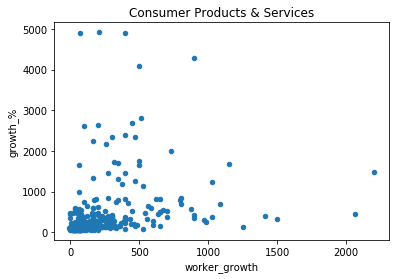

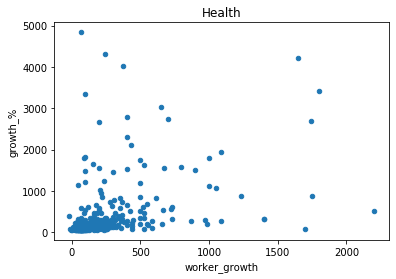

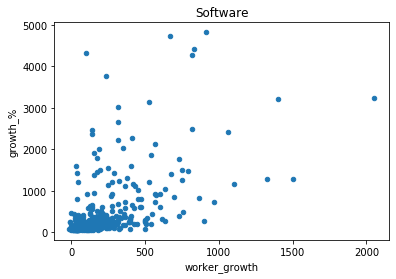

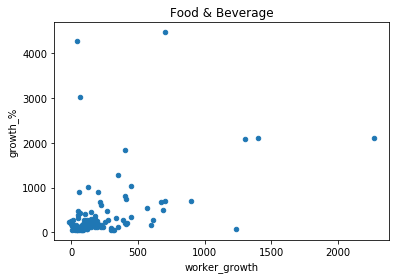

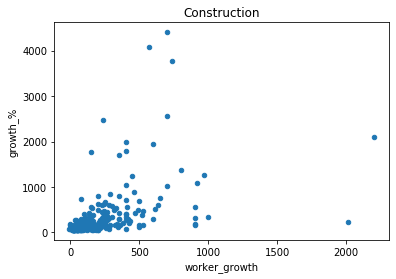

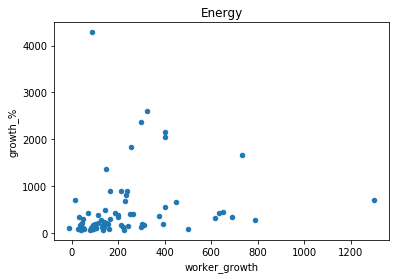

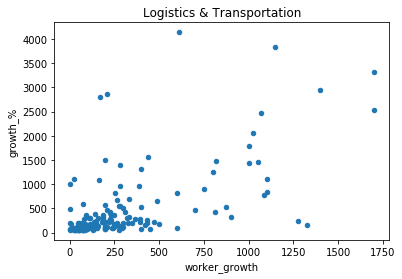

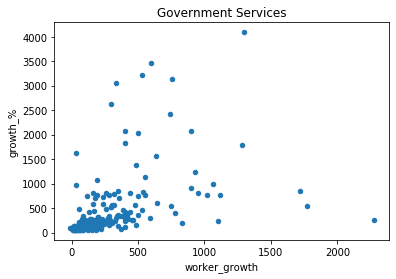

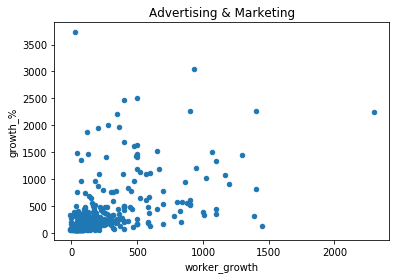

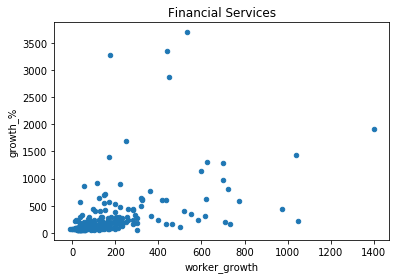

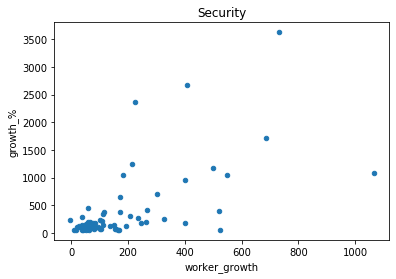

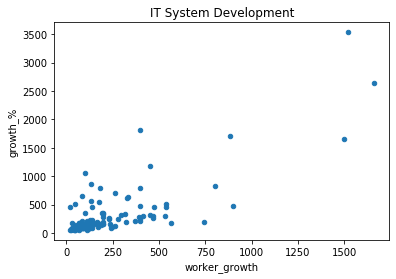

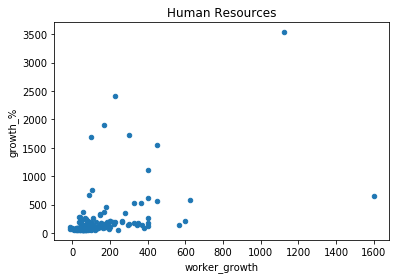

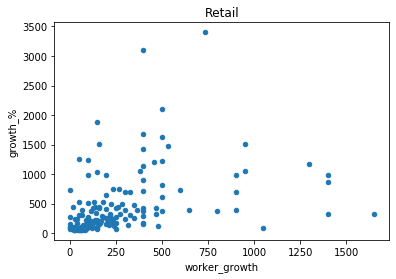

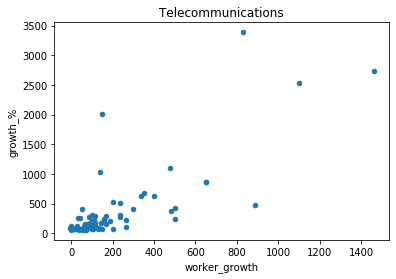

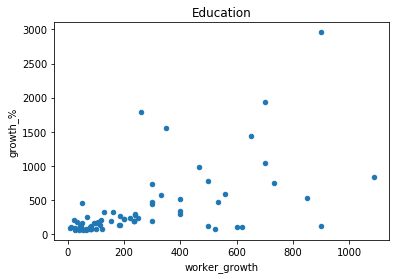

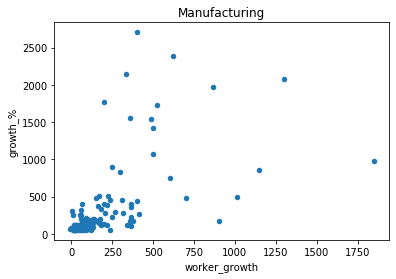

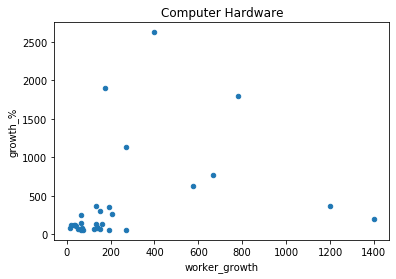

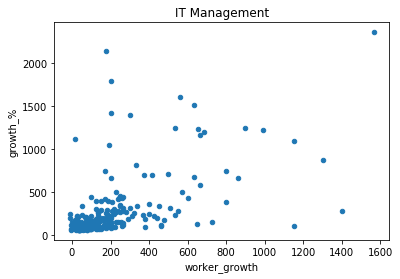

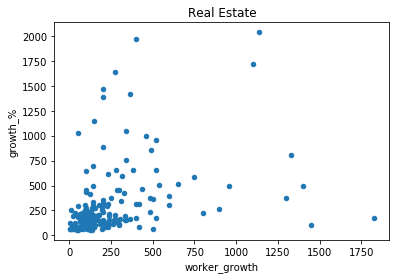

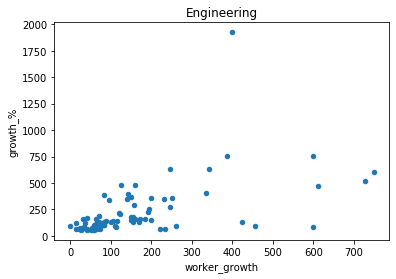

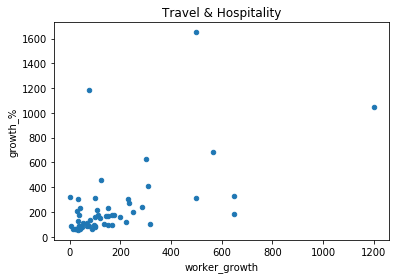

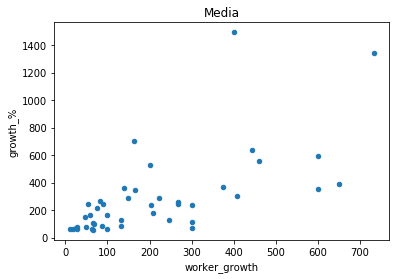

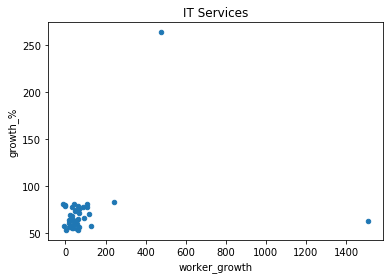

In [11]:
fig = plt.figure()
num = 1

for i in df_filtered.industry.unique():
    dfplot = df_filtered[df_filtered['industry']==i]
    num+=1
    dfplot.plot.scatter(x="worker_growth",y="growth_%",title = i, legend = False)

plt.show();

In [12]:
df_filtered.sort_values(by='worker_growth',ascending=False).head(10)

,rank,profile,name,url,state,revenue,growth_%,industry,workers,previous_workers,founded,yrs_on_list,metro,city,revenue_value,revenue_units,state_name,worker_growth
173,173,https://www.inc.com/profile/monkedia,Monkedia,monkedia.com,TX,17.4 Million,2240.0028,Advertising & Marketing,48.0,2,2014,2,Dallas,Irving,17.4,Million,Texas,2300.000000
1657,1653,https://www.inc.com/profile/kerberos-internati...,Kerberos International,kerberosinc.com,TX,4.1 Million,248.1487,Government Services,95.0,4,2006,2,NaN,Temple,4.1,Million,Texas,2275.000000
188,188,https://www.inc.com/profile/sifted,Sifted,sifted.co,GA,6.9 Million,2099.2097,Food & Beverage,142.0,6,2015,1,Atlanta,Atlanta,6.9,Million,Georgia,2266.666667
302,302,https://www.inc.com/profile/gravis-law,Gravis Law,gravislaw.com,WA,2.7 Million,1488.4058,Consumer Products & Services,46.0,2,2014,1,NaN,Richland,2.7,Million,Washington,2200.000000
186,186,https://www.inc.com/profile/oseth-group,Oseth Group,osethgroup.com,VA,5.4 Million,2107.0365,Construction,23.0,1,2015,1,"Washington, DC",Sterling,5.4,Million,Virginia,2200.000000
833,833,https://www.inc.com/profile/integrative-physiatry,Integrative Physiatry,integrativephysiatry.com,CA,5.1 Million,510.3643,Health,46.0,2,2014,1,Los Angeles,Irvine,5.1,Million,California,2200.000000
940,939,https://www.inc.com/profile/volo,VOLO,volocity.org,MD,8.5 Million,452.5668,Consumer Products & Services,65.0,3,2013,2,Baltimore,Baltimore,8.5,Million,Maryland,2066.666667
102,102,https://www.inc.com/profile/ownbackup,OwnBackup,ownbackup.com,NJ,9 Million,3244.5490,Software,86.0,4,2015,1,New York City,Fort Lee,9.0,Million,New Jersey,2050.000000
1735,1731,https://www.inc.com/profile/national-coatings,National Coatings,nationalcoatingsinc.com,NC,28.1 Million,234.6787,Construction,275.0,13,1996,4,"Raleigh, NC",Raleigh,28.1,Million,North Carolina,2015.384615
86,86,https://www.inc.com/profile/supportninja,SupportNinja,http://supportninja.com,TX,4.5 Million,3683.6824,Business Products & Services,463.0,22,2015,1,Austin,Austin,4.5,Million,Texas,2004.545455


In [13]:
(df_filtered[df_filtered["worker_growth"]<0])

,rank,profile,name,url,state,revenue,growth_%,industry,workers,previous_workers,founded,yrs_on_list,metro,city,revenue_value,revenue_units,state_name,worker_growth
1076,1073,https://www.inc.com/profile/prime-therapeutics,Prime Therapeutics,http://primetherapeutics.com,MN,21.4 Billion,390.5654,Health,3300.0,3900,1998,8,Minneapolis,Eagan,21400.0,Billion,Minnesota,-15.384615
1212,1209,https://www.inc.com/profile/jda-worldwide,JDA Worldwide,jdaworldwide.com,IN,24.6 Million,338.9351,Advertising & Marketing,37.0,43,2003,4,"Indianapolis, IN",CARMEL,24.6,Million,Indiana,-13.953488
1602,1598,https://www.inc.com/profile/taulia,Taulia,taulia.com,CA,48.8 Million,257.0561,Software,210.0,232,2009,1,San Francisco,San Francisco,48.8,Million,California,-9.482759
1671,1667,https://www.inc.com/profile/it-authorities,IT Authorities,itauthorities.com,FL,33.7 Million,245.9999,IT Management,105.0,115,2006,7,Tampa,Tampa,33.7,Million,Florida,-8.695652
1733,1729,https://www.inc.com/profile/tresata,Tresata,tresata.com,NC,18.4 Million,234.9963,Software,28.0,31,2011,4,Charlotte,Charlotte,18.4,Million,North Carolina,-9.677419
1793,1789,https://www.inc.com/profile/halo-maritime-defe...,Halo Maritime Defense Systems,http://halodefense.com,NH,8.4 Million,228.2692,Security,14.0,15,2008,1,Boston,Newton,8.4,Million,New Hampshire,-6.666667
1833,1829,https://www.inc.com/profile/perfect-snacks,Perfect Snacks,perfectsnacks.com,CA,84.1 Million,222.6079,Food & Beverage,105.0,121,2005,2,San Diego,San Diego,84.1,Million,California,-13.223140
2026,2022,https://www.inc.com/profile/cloudsmartz,CloudSmartz,cloudsmartz.com,NY,13 Million,198.5783,IT Management,7.0,8,2012,4,"Rochester, NY",Rochester,13.0,Million,New York,-12.500000
2054,2050,https://www.inc.com/profile/benton-roofing,Benton Roofing,bentonroofing.com,NC,26.8 Million,196.0311,Construction,36.0,37,1978,2,"Asheville, NC",East Flat Rock,26.8,Million,North Carolina,-2.702703
2297,2292,https://www.inc.com/profile/squaremouth,Squaremouth,squaremouth.com,FL,13.5 Million,175.3362,Insurance,35.0,36,2003,7,Tampa,St. Petersburg,13.5,Million,Florida,-2.777778


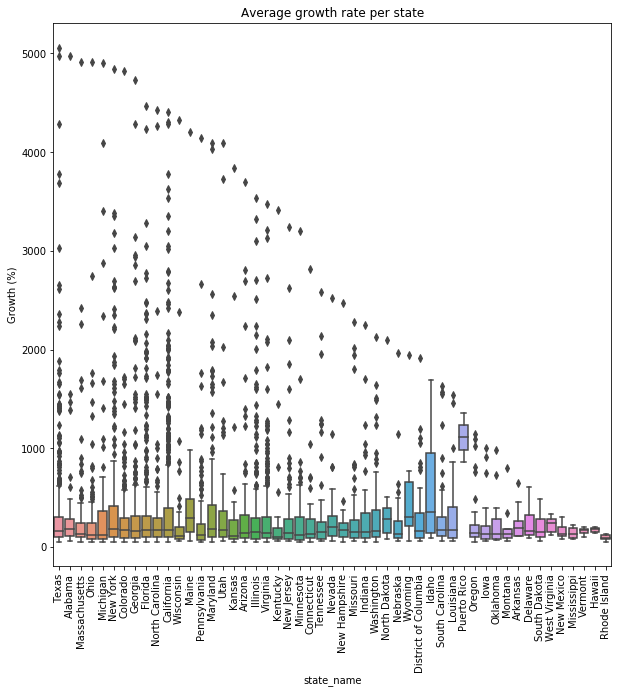

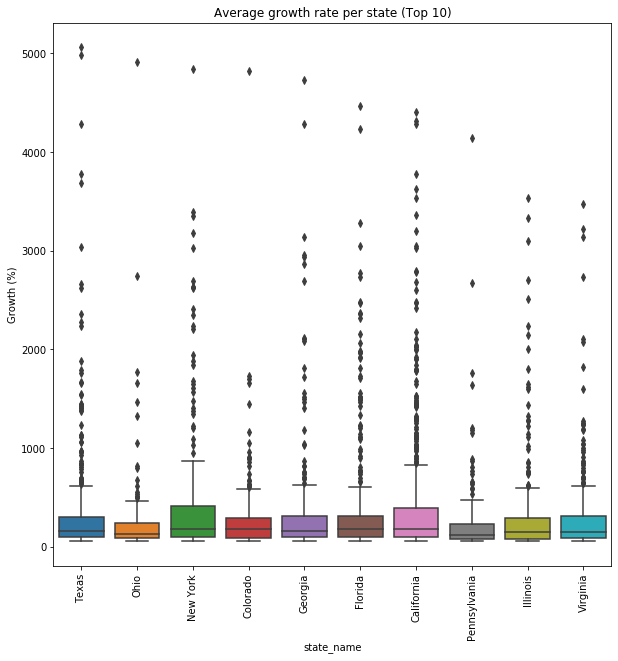

In [14]:
list_states = top10_states.State.to_list()
df_states = df_filtered[df_filtered['state_name'].isin(list_states)]

f, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x='state_name',y='growth_%',data=df_filtered)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_title("Average growth rate per state")
ax.set_ylabel("Growth (%)");


f, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x='state_name',y='growth_%',data=df_states)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_title("Average growth rate per state (Top 10)")
ax.set_ylabel("Growth (%)");

In [16]:
# Part 3: Industry Spread out across States

In [17]:
top10_states

,State,Number of Companies
0,California,712
1,Texas,467
2,Florida,385
3,New York,300
4,Virginia,288
5,Illinois,241
6,Georgia,219
7,Pennsylvania,172
8,Ohio,160
9,Colorado,156


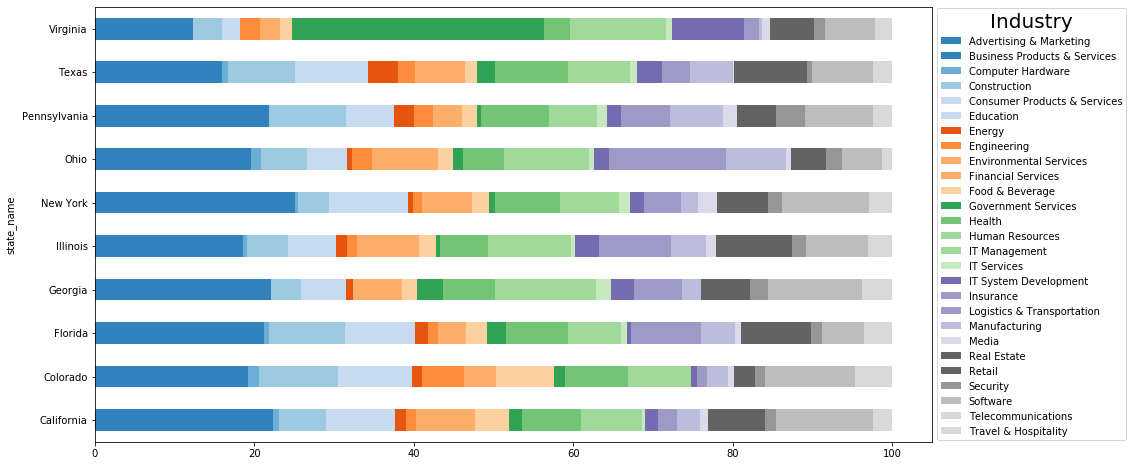

In [18]:
df_states_industry = df_states.groupby(by=['state_name','industry'])['rank'].count().to_frame().reset_index().rename(columns={'rank':'count'})

df_states_industry = pd.merge(df_states_industry, 
        df_states_industry.groupby(by=['state_name'])['count'].sum(),
        how='left',
        on='state_name',suffixes=("","_total"))

df_states_industry['percent'] = df_states_industry['count']/df_states_industry['count_total'] * 100


df_stacked_plot = df_states_industry.pivot(index='state_name',columns='industry',values='percent')

ax = df_stacked_plot.plot(kind='barh',stacked=True,colormap='tab20c',figsize=(15,8))

ax.legend(title = "Industry",title_fontsize=20,loc='center left',bbox_to_anchor=(1,0.5))

plt.show()

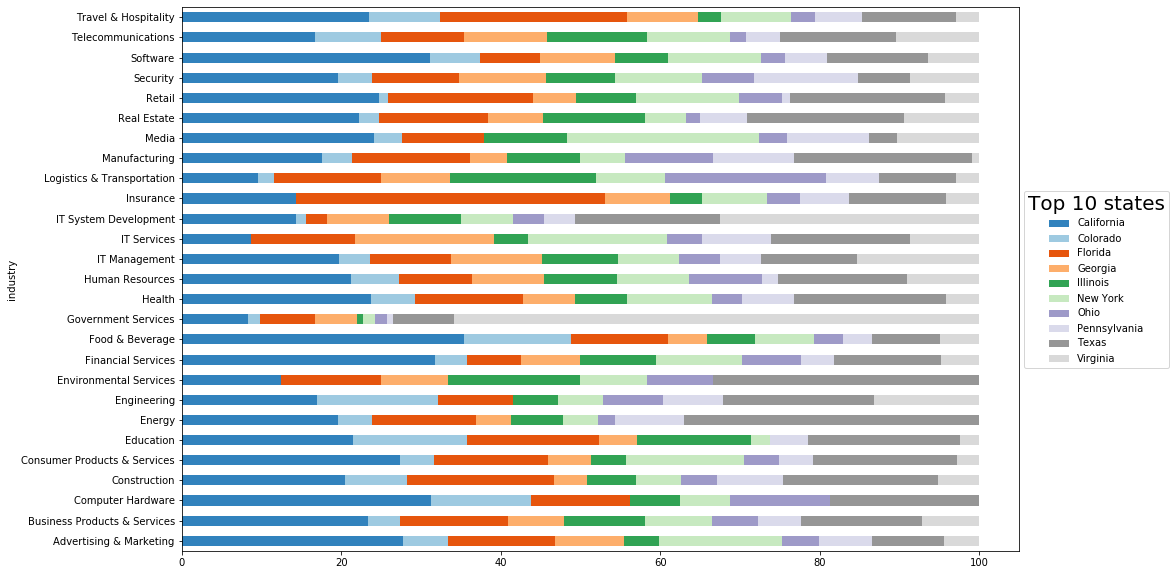

In [171]:
df_states_industry = df_states.groupby(by=['state_name','industry'])['rank'].count().to_frame().reset_index().rename(columns={'rank':'count'})

df_states_industry = pd.merge(df_states_industry, 
        df_states_industry.groupby(by=['industry'])['count'].sum(),
        how='left',
        on='industry',suffixes=("","_total"))

df_states_industry['percent'] = df_states_industry['count']/df_states_industry['count_total'] * 100


df_stacked_plot = df_states_industry.pivot(index='industry',columns='state_name',values='percent')

ax = df_stacked_plot.plot(kind='barh',stacked=True,colormap='tab20c',figsize=(15,10))

ax.legend(title = "Top 10 states",title_fontsize=20,loc='center left',bbox_to_anchor=(1,0.5))

plt.show()

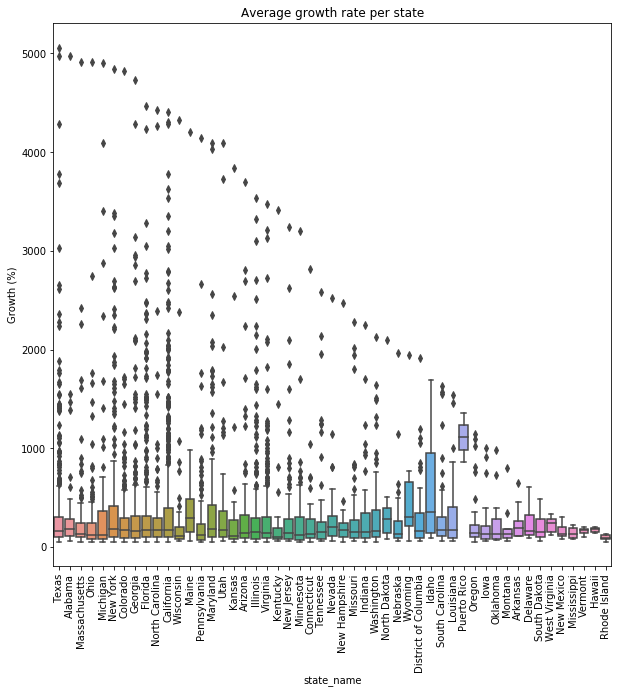

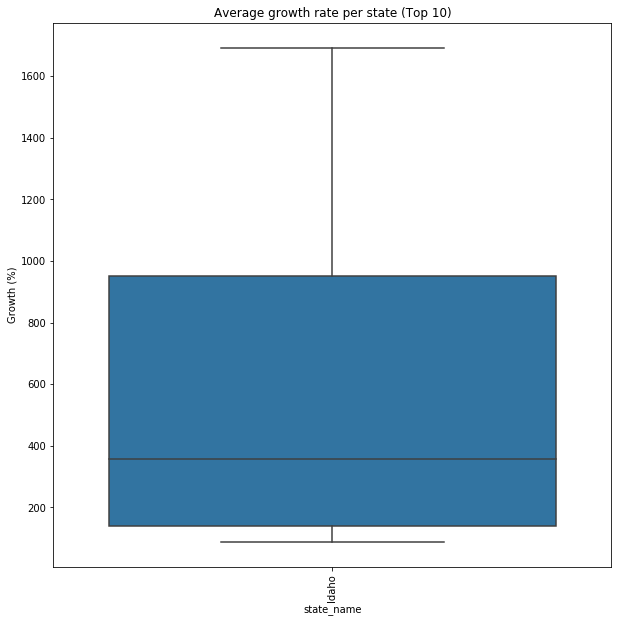

In [20]:
## Adhoc for Idaho
df_states = df_filtered[df_filtered['state_name']=="Idaho"]

f, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x='state_name',y='growth_%',data=df_filtered)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_title("Average growth rate per state")
ax.set_ylabel("Growth (%)");


f, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x='state_name',y='growth_%',data=df_states)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_title("Average growth rate per state (Top 10)")
ax.set_ylabel("Growth (%)");

In [21]:
df[df['state_name']=='Idaho']['industry'].value_counts()

Software                        4
Logistics & Transportation      2
Retail                          2
Business Products & Services    2
Telecommunications              2
Construction                    2
Real Estate                     1
Advertising & Marketing         1
Consumer Products & Services    1
Media                           1
Education                       1
Human Resources                 1
Health                          1
Name: industry, dtype: int64